### Data Overview


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Loading first dataset

path = "/.../Churn/Dataset.xlsx"
df = pd.read_excel(path, sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
# Importing second dataset

path = "/content/drive/MyDrive/Projects/Churn/Dataset.xlsx"
dsc = pd.read_excel(path, sheet_name='Data Dict')
dsc

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Description
1,NaN,E Comm,CustomerID,Unique customer ID
2,NaN,E Comm,Churn,Churn Flag
3,NaN,E Comm,Tenure,Tenure of customer in organization
4,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer
5,NaN,E Comm,CityTier,City tier
6,NaN,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
7,NaN,E Comm,PreferredPaymentMode,Preferred payment method of customer
8,NaN,E Comm,Gender,Gender of customer
9,NaN,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


In [ ]:
print(df.shape)

(5630, 20)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Checking for missing data

df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

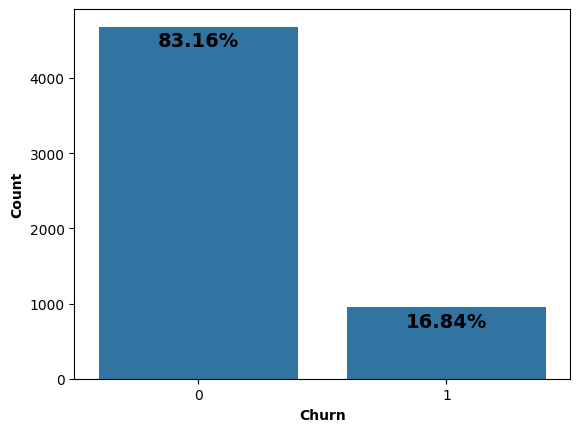

In [ ]:
# Checking if the dataset is imbalanced. It is. Most of the datapoints are of retained customers.

ax = sns.countplot(x='Churn', data=df)

ax.set_ylabel('Count', fontweight='bold')
ax.set_xlabel('Churn', fontweight='bold')

for a in ax.patches:
    percentage = format((a.get_height()/5630)*100, '.2f') + '%'
    ax.annotate(percentage, (a.get_x() + a.get_width()/2., a.get_height()), \
                ha='center', va='center', size=14, fontweight='bold', xytext=(0, -10), textcoords='offset points')

plt.show()

In [ ]:
# Cheking the categorical variables for inconsistencies.

for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("********************************************************************************************************")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
********************************************************************************************************
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
********************************************************************************************************
Gender : ['Female' 'Male']
Male      3384
Female    2246
Name: Gender, dtype: int64
********************************************************************************************************
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Laptop & Accessory    2050
M

The features 'PreferredLoginDevice', 'PreferedOrderCat' e 'PreferredPaymentMode' have minor labelling issues (duplicate labels).

In [ ]:
# Correcting minor input errors in categorical variables

df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [ ]:
# Correcting minor input errors in categorical variables

df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
# Checking numerical variables

for col in df.columns:
    if col != 'CustomerID' and (df[col].dtype == float or df[col].dtype == int):
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("********************************************************************************************************")

Churn : [1 0]
0    4682
1     948
Name: Churn, dtype: int64
********************************************************************************************************
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64
********************************************************************************************************
CityTier : [3 1 2]
1    3666
3    1722
2     242
Name: CityTier, dtype: int64
********************************

General Overview:

   Dataset has 5630 rows and 20 columns.
   No duplicate entries observed.
   Focus on data exploration; handling missing values planned during model building.

Data Hygiene:

   Categorical variables assessed; typos corrected.

Additional Information:

   More retained than churned customers; ratio is approximately 5 to 1.
   Churn rate is very low, typical for most businesses, but the data is imbalanced.

### Exploratory Data Analysis


In [ ]:
# Selecting columns by type

target = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfDeviceRegistered', 'NumberOfAddress',
       'SatisfactionScore']

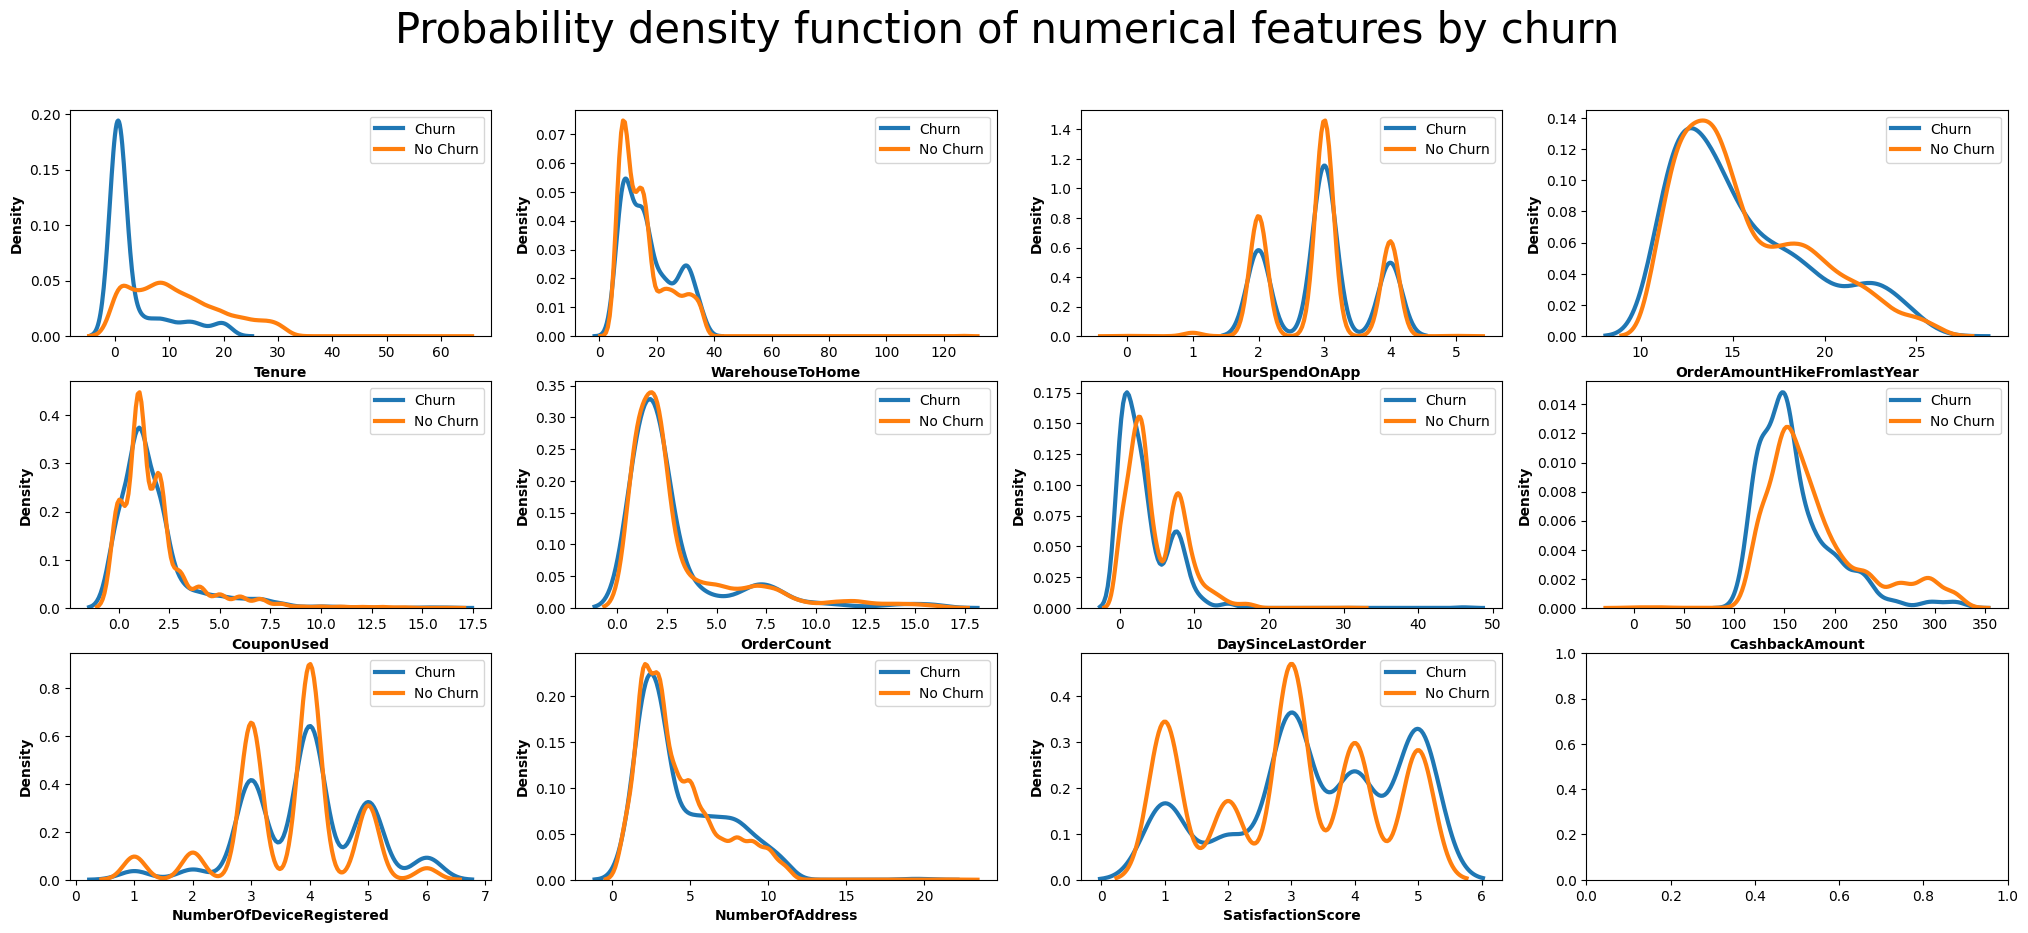

In [ ]:
# Numerical variables probability density function by churn

df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(3,4,figsize=(25, 10))
fig.suptitle('Probability density function of numerical features by churn', fontsize=30)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

    ax[idx].set_xlabel(c, fontweight='bold')
    ax[idx].set_ylabel('Density', fontweight='bold')

plt.show()

In [ ]:
# Converting num_cols to categories for vizualization purposes

df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

CustomerID                       int64
Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

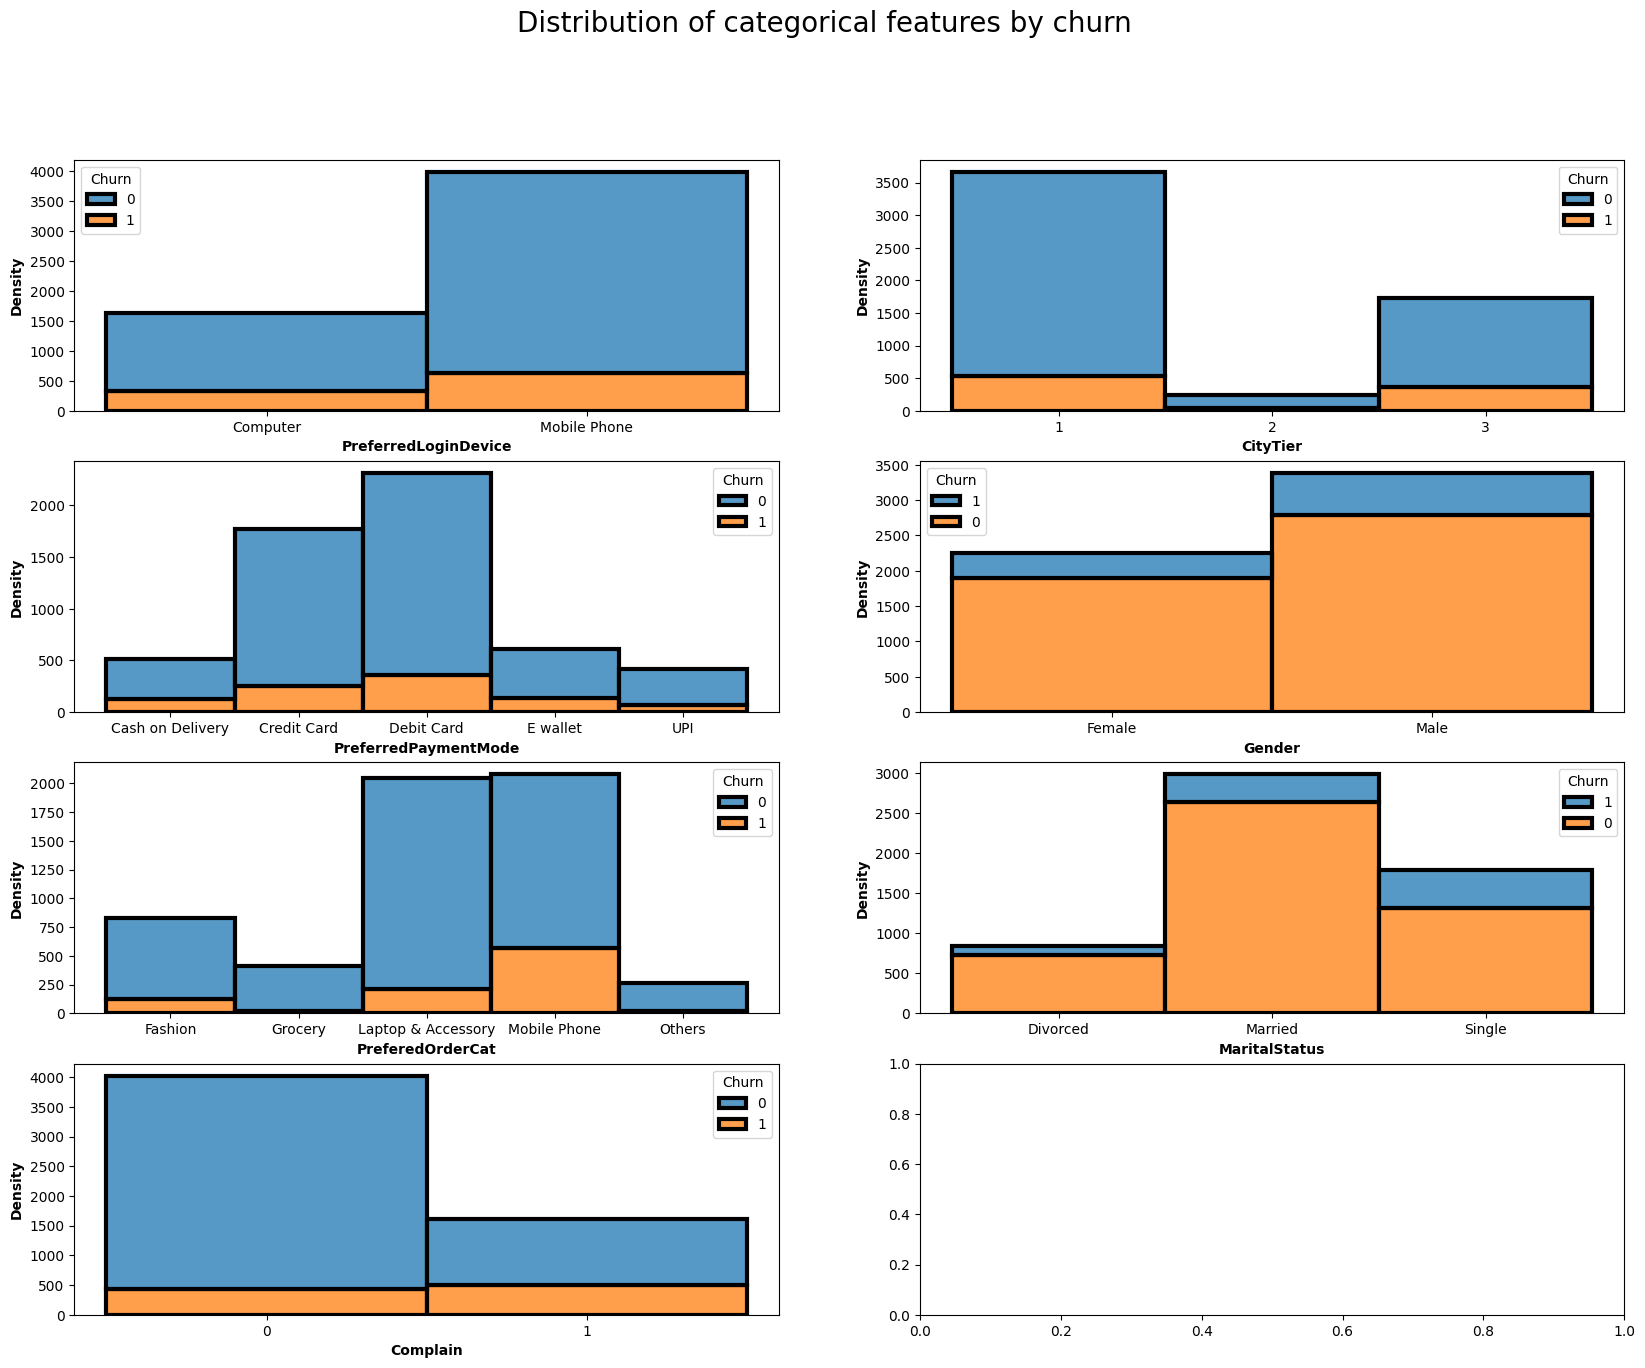

In [ ]:
df_c = df2[df2['Churn']=='1'].copy()
df_nc = df2[df2['Churn']=='0'].copy()

fig, ax = plt.subplots(4, 2, figsize=(20, 15))
fig.suptitle('Distribution of categorical features by churn', fontsize=20)
ax = ax.flatten()

for idx, c in enumerate(cat_cols):
    sorted_df = df2.sort_values(by=c)  # Sort DataFrame by the 'c' column
    sns.histplot(data=sorted_df, x=c, hue='Churn', multiple='stack', ax=ax[idx], linewidth=3)
    ax[idx].set_xlabel(c, fontweight='bold')
    ax[idx].set_ylabel('Density', fontweight='bold')

plt.show()

There are some interesting takes from the above figures:

1- City 3 appears to have a higher churn rate than the other city types. Is it the case? Why so?

2- Is there a churn rate difference between men and women? If it is the case, why?

3- Laptop and Accessories seem to have a much lower churn rate when compared to Mobile Phone. Why is it the case?

4- Single people appear to have higher churn rate. Why so?

5- Cash on Delivery seem so have higher churn rate than the other payment modes. If true, why?

We can see that the features "Complain", "Tenure", "Days since last order" and "Cashback amount" appear to have more significant differences between churned and not churned customers distribution functions. This indicate a possible correlation between those variables and Churn, being useful for the the prediction model. Let's see the actual correlation values of all features and check that.

Note: Kernel Density Estimation charts with probability density functions (first figure from EDA section) are not optimal for discrete variables, however, given the amount of different values in the dataset, general insights can be drawn from the plotted data.  

<Axes: >

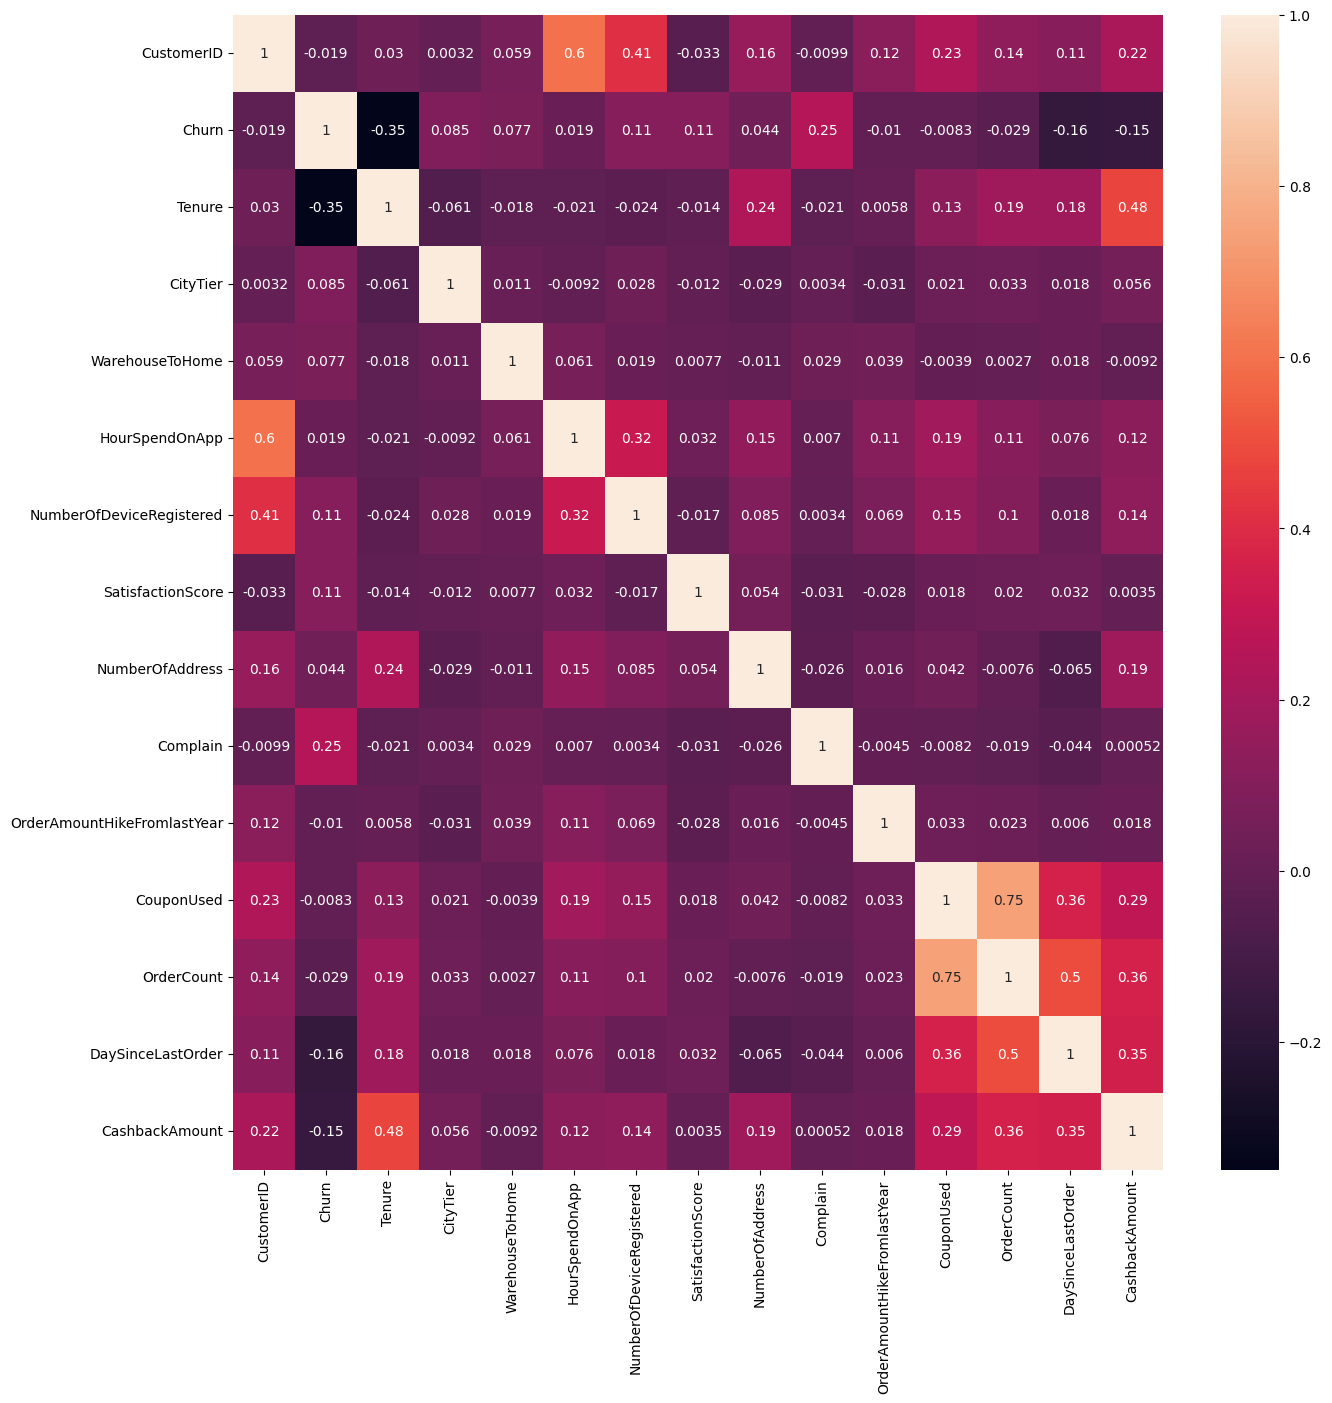

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Calculate correlation matrix, extract correlation values of all features with Churn and sort correlation values in descending order.
corr_matrix = df.corr()

churn_correlation = corr_matrix['Churn'].drop('Churn')

sorted_churn_correlation = churn_correlation.sort_values(ascending=False)

print("Correlation values of all features with 'Churn' (in descending order):")
print(sorted_churn_correlation)

Correlation values of all features with 'Churn' (in descending order):
Complain                       0.250188
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
HourSpendOnApp                 0.018675
CouponUsed                    -0.008264
OrderAmountHikeFromlastYear   -0.010058
CustomerID                    -0.019083
OrderCount                    -0.028697
CashbackAmount                -0.154118
DaySinceLastOrder             -0.160757
Tenure                        -0.349408
Name: Churn, dtype: float64


The larger the correlation coefficient with churn, the more usefull it will be when using such ferature in the prediction model for churn. For the purpose of data analysis (and it's business implications) we will dig deeper into some features with higher correlation values. The features with most correlation are: "Tenure" (-0,34), "Complain" (0,25), "DaySinceLastOrder" (-0,16), "CashbackAmount" (-0,15), "NumberOfDeviceRegistered" (0,1), "Satisfaction Score" (0,1) and "City Tier" (0,08). It is clear the rational behind a positive correlation between Churn and Complain, the same way that a negative correlation with Tenure and Cashback makes sense. However, the negative corelation with Days Since Last Order, and the positive correlation with City Tier, Number of Device Registered have no obvious logic behind them. The most intriguing correlation is with Satisfaction Score, which is positive. We will take a closer look into it.

In [ ]:
#The highest correlation coefficients between features (other than churn)

corr_matrix = df.drop(columns=['Churn', 'CustomerID']).corr()


filtered_corr_matrix = corr_matrix[(corr_matrix.abs() > 0.15) & (corr_matrix.abs() < 1)]


for column in filtered_corr_matrix.columns:
    correlated_features = filtered_corr_matrix[column].dropna().index.tolist()
    correlated_values = filtered_corr_matrix[column].dropna().tolist()


    correlated_features = [feature for feature in correlated_features if feature != column]
    correlated_values = [value for value in correlated_values if abs(value) > 0.10]

    if correlated_values:
        print(f"Correlation with '{column}':")
        for feature, value in zip(correlated_features, correlated_values):
            print(f"{feature}: {value: .3f}")
        print("-----")


Correlation with 'Tenure':
NumberOfAddress:  0.238
OrderCount:  0.186
DaySinceLastOrder:  0.185
CashbackAmount:  0.476
-----
Correlation with 'HourSpendOnApp':
NumberOfDeviceRegistered:  0.317
CouponUsed:  0.192
-----
Correlation with 'NumberOfDeviceRegistered':
HourSpendOnApp:  0.317
CouponUsed:  0.152
-----
Correlation with 'NumberOfAddress':
Tenure:  0.238
CashbackAmount:  0.187
-----
Correlation with 'CouponUsed':
HourSpendOnApp:  0.192
NumberOfDeviceRegistered:  0.152
OrderCount:  0.745
DaySinceLastOrder:  0.359
CashbackAmount:  0.287
-----
Correlation with 'OrderCount':
Tenure:  0.186
CouponUsed:  0.745
DaySinceLastOrder:  0.498
CashbackAmount:  0.361
-----
Correlation with 'DaySinceLastOrder':
Tenure:  0.185
CouponUsed:  0.359
OrderCount:  0.498
CashbackAmount:  0.347
-----
Correlation with 'CashbackAmount':
Tenure:  0.476
NumberOfAddress:  0.187
CouponUsed:  0.287
OrderCount:  0.361
DaySinceLastOrder:  0.347
-----


1- Checking City Tier

In [ ]:
# Group data by 'CityTier' and 'Churn', and count the number of data points
grouped_data_ct = df.groupby(['CityTier', 'Churn']).size().unstack(fill_value=0)

# Calculate the total number of data points for each 'CityTier' value
total_data_points_ct = df.groupby('CityTier').size()

# Calculate the relative percentage of churned data points for each 'CityTier' value
percentage_data_ct = (grouped_data_ct[1] / total_data_points_ct) * 100

# Sort the percentage data in descending order
percentage_data_sorted_ct = percentage_data_ct.sort_values(ascending=False)

# Print the results in descending order of percentage
for city_tier in percentage_data_sorted_ct.index:
    churn_count_ct = grouped_data_ct[1][city_tier]
    total_count_ct = total_data_points_ct[city_tier]
    percentage_ct = percentage_data_ct[city_tier]
    print(f"CityTier {city_tier}: Churned: {churn_count_ct}, Percentage: {percentage_ct:.2f}% (out of {total_count_ct} data points)")

# Calculate mean, median, and standard deviation of churn ratios
churn_ratios_ct = percentage_data_ct.values
mean_churn_ratio_ct = np.mean(churn_ratios_ct)
median_churn_ratio_ct = np.median(churn_ratios_ct)
std_dev_churn_ratio_ct = np.std(churn_ratios_ct)

# Print the results
print(f"Mean Churn Ratio: {mean_churn_ratio_ct:.2f}%")
print(f"Median Churn Ratio: {median_churn_ratio_ct:.2f}%")
print(f"Standard Deviation of Churn Ratios: {std_dev_churn_ratio_ct:.2f}%")

CityTier 3: Churned: 368, Percentage: 21.37% (out of 1722 data points)
CityTier 2: Churned: 48, Percentage: 19.83% (out of 242 data points)
CityTier 1: Churned: 532, Percentage: 14.51% (out of 3666 data points)
Mean Churn Ratio: 18.57%
Median Churn Ratio: 19.83%
Standard Deviation of Churn Ratios: 2.94%


As imagined there is a difference between Churn ratios among the 3 City Tiers. Tier 3 has the most churned clients (21.37% of all Tier 3 individuals), with Tier 2 coming in second place (19.83%) and city 1 with the least amount churned customers (14.51%).

In [ ]:
# Create violin plots for each 'CityTier' value
fig_ct1 = px.violin(df, x='CityTier', y='Tenure', box=True, points="all", color='CityTier')

# Update layout
fig_ct1.update_layout(title='Distribution of Tenure by CityTier',
                  xaxis_title='CityTier',
                  yaxis_title='Tenure')

# Show plot
fig_ct1.show()

This figure displays the distribution of 'Tenure' values for each City Tier. These violin plots are useful, since Tenure is the feature with highest absolute correlation value with Churn (-0,34). It may help us understand why there is churn ratio difference between City Tiers. As we can closely, the median value of Tenure value in Tier 3 is as expected lower than the other cities (8), with Tier 2 with highest median (11). We can notice it by

In [ ]:
# Create dataframe for plotting
plot_data_ct2 = df.groupby(['CityTier', 'Complain']).size().unstack(fill_value=0)

# Calculate percentages for each category
plot_data_percentage_ct2 = plot_data_ct2.div(plot_data_ct2.sum(axis=1), axis=0) * 100

# Reshape dataframe for plotting
plot_data_ct2 = plot_data_ct2.reset_index().melt(id_vars='CityTier', var_name='Complain', value_name='Count')
plot_data_percentage_ct2 = plot_data_percentage_ct2.reset_index().melt(id_vars='CityTier', var_name='Complain', value_name='Percentage')

# Merge count and percentage data
plot_data_ct2 = pd.merge(plot_data_ct2, plot_data_percentage_ct2, on=['CityTier', 'Complain'])

# Create text labels for the count and percentage values
plot_data_ct2['text'] = plot_data_ct2['Count'].astype(str) + ' (' + plot_data_ct2['Percentage'].round(2).astype(str) + '%)'

# Create bar plot using Plotly Express
fig_ct2 = px.bar(plot_data_ct2, x='CityTier', y='Count', color='Complain', barmode='group',
             text='text', labels={'CityTier': 'CityTier', 'Count': 'Count'},
             title='Distribution of CityTier by Complain',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout to include count and percentage values on top of bars
fig_ct2.update_traces(textposition='outside')

# Show plot
fig_ct2.show()

The bar chart above shows the relationship between Complain, the second  feature with the highest absolute correlation value with Churn (0,25) and CityTier. Again, as expected City Tier 3 has the highest ratio of complain among all City Tiers with 28,92%, followed closely by Tier 1 with 28,48% and Tier 2 coming last with 25,62%.

Overall it is clear why City Tier 3 has higher churn ratio than the other Tiers. It has high Complain ratio and a lower Tenure values. City Tier 2 probably comes in second place for churn ratios by a confluence of factors envolving other features with smaller correlation values with Churn.

Further data is required to assess why City Tier 3 customers are churning more in order to adress the issue. However City Tier 1 customers still constitute the largest group of customers and have the lowest churn ratio.

2- Checking Gender

In [ ]:
# Group data by 'Gender' and 'Churn', and count the number of data points
grouped_data_gd = df.groupby(['Gender', 'Churn']).size().unstack(fill_value=0)

# Calculate the total number of data points for each 'Gender' value
total_data_points_gd = df.groupby('Gender').size()

# Calculate the relative percentage of churned data points for each 'Gender' value
percentage_data_gd = (grouped_data_gd[1] / total_data_points_gd) * 100

# Sort the percentage data in descending order
percentage_data_sorted_gd = percentage_data_gd.sort_values(ascending=False)

# Print the results in descending order of percentage
for gender in percentage_data_sorted_gd.index:
    churn_count_gd = grouped_data_gd[1][gender]
    total_count_gd = total_data_points_gd[gender]
    percentage_gd = percentage_data_gd[gender]
    print(f"Gender {gender}: Churned: {churn_count_gd}, Percentage: {percentage_gd:.2f}% (out of {total_count_gd} data points)")

# Calculate mean, median, and standard deviation of churn ratios
churn_ratios_gd = percentage_data_gd.values
mean_churn_ratio_gd = np.mean(churn_ratios_gd)
median_churn_ratio_gd = np.median(churn_ratios_gd)
std_dev_churn_ratio_gd = np.std(churn_ratios_gd)

# Print the results
print(f"Mean Churn Ratio: {mean_churn_ratio_gd:.2f}%")
print(f"Median Churn Ratio: {median_churn_ratio_gd:.2f}%")
print(f"Standard Deviation of Churn Ratios: {std_dev_churn_ratio_gd:.2f}%")

Gender Male: Churned: 600, Percentage: 17.73% (out of 3384 data points)
Gender Female: Churned: 348, Percentage: 15.49% (out of 2246 data points)
Mean Churn Ratio: 16.61%
Median Churn Ratio: 16.61%
Standard Deviation of Churn Ratios: 1.12%


As the data points out, there is no significant difference in churn ratios between genders. Male customers churn at a rate of 17,73%, while female churn at 15,49%. No major relevance in this feature regarding the determination of churn.

3- Checking PreferedOrderCat

In [ ]:
# Group data by 'PreferedOrderCat' and 'Churn', and count the number of data points
grouped_data_poc = df.groupby(['PreferedOrderCat', 'Churn']).size().unstack(fill_value=0)

# Calculate the total number of data points for each 'PreferedOrderCat' value
total_data_points_poc = df.groupby('PreferedOrderCat').size()

# Calculate the relative percentage of churned data points for each 'PreferedOrderCat' value
percentage_data_poc = (grouped_data_poc[1] / total_data_points_poc) * 100

# Sort the percentage data in descending order
percentage_data_sorted_poc = percentage_data_poc.sort_values(ascending=False)

# Print the results in descending order of percentage
for preferredordecat in percentage_data_sorted_poc.index:
    churn_count_poc = grouped_data_poc[1][preferredordecat]
    total_count_poc = total_data_points_poc[preferredordecat]
    percentage_poc = percentage_data_poc[preferredordecat]
    print(f"PreferedOrderCat {preferredordecat}: Churned: {churn_count_poc}, Percentage: {percentage_poc:.2f}% (out of {total_count_poc} data points)")

# Calculate mean, median, and standard deviation of churn ratios
churn_ratios_poc = percentage_data_poc.values
mean_churn_ratio_poc = np.mean(churn_ratios_poc)
median_churn_ratio_poc = np.median(churn_ratios_poc)
std_dev_churn_ratio_poc = np.std(churn_ratios_poc)

# Print the results
print(f"Mean Churn Ratio: {mean_churn_ratio_poc:.2f}%")
print(f"Median Churn Ratio: {median_churn_ratio_poc:.2f}%")
print(f"Standard Deviation of Churn Ratios: {std_dev_churn_ratio_poc:.2f}%")

PreferedOrderCat Mobile Phone: Churned: 570, Percentage: 27.40% (out of 2080 data points)
PreferedOrderCat Fashion: Churned: 128, Percentage: 15.50% (out of 826 data points)
PreferedOrderCat Laptop & Accessory: Churned: 210, Percentage: 10.24% (out of 2050 data points)
PreferedOrderCat Others: Churned: 20, Percentage: 7.58% (out of 264 data points)
PreferedOrderCat Grocery: Churned: 20, Percentage: 4.88% (out of 410 data points)
Mean Churn Ratio: 13.12%
Median Churn Ratio: 10.24%
Standard Deviation of Churn Ratios: 7.96%


As the above data shows, the category 'Laptop & Accessory' in feature 'PreferedOrderCat' has a churn rate below the average among all categories with 10,24% while the average is 13,12%. It is the third place with lowest rate, losing only for categories 'Others' with 7,58% and 'Grocery' with 4,88%. Customers that purchased items in categories 'Mobile Phone' and 'Fashion' are represent 43,90% of all churned population. This result coincides with preliminary findings.

In [ ]:
# Create violin plots for each 'CityTier' value
fig_poc1 = px.violin(df, x='PreferedOrderCat', y='Tenure', box=True, points="all", color='PreferedOrderCat')

# Update layout
fig_poc1.update_layout(title='Distribution of Tenure by PreferedOrderCat',
                  xaxis_title='PreferedOrderCat',
                  yaxis_title='Tenure')

# Show plot
fig_poc1.show()

The violin plot above showing the relationship between PreferedOrderCat and Tenure shows as predicted a similar story to the churn ratio. 'Mobile Phone' category has a Tenure median of 3 and is followed by 'Laptop & Accessory' with a median of 8, 'Fashion' with 11, 'Others' with 20 and 'Grocery' with 21. Given that Tenure correlates highly with Churn, it makes sense that the order of Tenure medians would be so similar to the churn ratios.

In [ ]:
# Create dataframe for plotting
plot_data_poc2 = df.groupby(['PreferedOrderCat', 'Complain']).size().unstack(fill_value=0)

# Calculate percentages for each category
plot_data_percentage_poc2 = plot_data_poc2.div(plot_data_poc2.sum(axis=1), axis=0) * 100

# Reshape dataframe for plotting
plot_data_poc2 = plot_data_poc2.reset_index().melt(id_vars='PreferedOrderCat', var_name='Complain', value_name='Count')
plot_data_percentage_poc2 = plot_data_percentage_poc2.reset_index().melt(id_vars='PreferedOrderCat', var_name='Complain', value_name='Percentage')

# Merge count and percentage data
plot_data_poc2 = pd.merge(plot_data_poc2, plot_data_percentage_poc2, on=['PreferedOrderCat', 'Complain'])

# Create text labels for the count and percentage values
plot_data_poc2['text'] = plot_data_poc2['Count'].astype(str) + ' (' + plot_data_poc2['Percentage'].round(2).astype(str) + '%)'

# Create bar plot using Plotly Express
fig_poc2 = px.bar(plot_data_poc2, x='PreferedOrderCat', y='Count', color='Complain', barmode='group',
             text='text', labels={'CityTier': 'PreferedOrderCat', 'Count': 'Count'},
             title='Distribution of PreferedOrderCat by Complain',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout to include count and percentage values on top of bars
fig_poc2.update_traces(textposition='outside')

# Show plot
fig_poc2.show()

Interestingly, when we breakdown the order categories by Complain we see a somewhat different. The purchased items labeled Grocery and Fashion which have the lowest churn ratios among all groups, are 2 of the top 3 categories with the highest complain ratios with 30,73% and 29,30% respectively, accompanied by Mobile Phone with 29,33%. This demonstrates the particular characteristics of such products. Most probably it has to do with the non-standarization of such items such as size, color, textures and it's  interaction with the buyer (i.e. of the item fits the particular needs of the him). It contrasts with the complete standardization of eletronic products (i.e. Mobile Phones, Laptop & Accessories), that can easily be compared with others beforehand, therefore making their performance less of a surprise when in customers hands.

4- Checking MaritalStatus

In [ ]:
# Group data by 'MaritalStatus' and 'Churn', and count the number of data points
grouped_data_ms = df.groupby(['MaritalStatus', 'Churn']).size().unstack(fill_value=0)

# Calculate the total number of data points for each 'MaritalStatus' value
total_data_points_ms = df.groupby('MaritalStatus').size()

# Calculate the relative percentage of churned data points for each 'MaritalStatus' value
percentage_data_ms = (grouped_data_ms[1] / total_data_points_ms) * 100

# Sort the percentage data in descending order
percentage_data_sorted_ms = percentage_data_ms.sort_values(ascending=False)

# Print the results in descending order of percentage
for maritalstatus in percentage_data_sorted_ms.index:
    churn_count_ms = grouped_data_ms[1][maritalstatus]
    total_count_ms = total_data_points_ms[maritalstatus]
    percentage_ms = percentage_data_ms[maritalstatus]
    print(f"MaritalStatus {maritalstatus}: Churned: {churn_count_ms}, Percentage: {percentage_ms:.2f}% (out of {total_count_ms} data points)")

# Calculate mean, median, and standard deviation of churn ratios
churn_ratios_ms = percentage_data_ms.values
mean_churn_ratio_ms = np.mean(churn_ratios_ms)
median_churn_ratio_ms = np.median(churn_ratios_ms)
std_dev_churn_ratio_ms = np.std(churn_ratios_ms)

# Print the results
print(f"Mean Churn Ratio: {mean_churn_ratio_ms:.2f}%")
print(f"Median Churn Ratio: {median_churn_ratio_ms:.2f}%")
print(f"Standard Deviation of Churn Ratios: {std_dev_churn_ratio_ms:.2f}%")

MaritalStatus Single: Churned: 480, Percentage: 26.73% (out of 1796 data points)
MaritalStatus Divorced: Churned: 124, Percentage: 14.62% (out of 848 data points)
MaritalStatus Married: Churned: 344, Percentage: 11.52% (out of 2986 data points)
Mean Churn Ratio: 17.62%
Median Churn Ratio: 14.62%
Standard Deviation of Churn Ratios: 6.56%


In [ ]:
# Create violin plots for each 'CityTier' value
fig_ms1 = px.violin(df, x='MaritalStatus', y='Tenure', box=True, points="all", color='MaritalStatus')

# Update layout
fig_ms1.update_layout(title='Distribution of Tenure by MaritalStatus',
                  xaxis_title='MaritalStatus',
                  yaxis_title='Tenure')

# Show plot
fig_ms1.show()

As we can see in the above violin chart comparing Marital Status with Tenure, the order of Marital Status labels with lowest Tenure median is exactly the same as the labels with the highest churn ratios, as expected. Single customers first with median 7, divorced with median 9 and Married with 10.

In [ ]:
# Create dataframe for plotting
plot_data_ms2 = df.groupby(['MaritalStatus', 'Complain']).size().unstack(fill_value=0)

# Calculate percentages for each category
plot_data_percentage_ms2 = plot_data_ms2.div(plot_data_ms2.sum(axis=1), axis=0) * 100

# Reshape dataframe for plotting
plot_data_ms2 = plot_data_ms2.reset_index().melt(id_vars='MaritalStatus', var_name='Complain', value_name='Count')
plot_data_percentage_ms2 = plot_data_percentage_ms2.reset_index().melt(id_vars='MaritalStatus', var_name='Complain', value_name='Percentage')

# Merge count and percentage data
plot_data_ms2 = pd.merge(plot_data_ms2, plot_data_percentage_ms2, on=['MaritalStatus', 'Complain'])

# Create text labels for the count and percentage values
plot_data_ms2['text'] = plot_data_ms2['Count'].astype(str) + ' (' + plot_data_ms2['Percentage'].round(2).astype(str) + '%)'

# Create bar plot using Plotly Express
fig_ms2 = px.bar(plot_data_ms2, x='MaritalStatus', y='Count', color='Complain', barmode='group',
             text='text', labels={'CityTier': 'MaritalStatus', 'Count': 'Count'},
             title='Distribution of MaritalStatus by Complain',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout to include count and percentage values on top of bars
fig_ms2.update_traces(textposition='outside')

# Show plot
fig_ms2.show()

In the bar chart above we cant spot a major difference between complain ratio and Marital Status labels. Divorced, Married and Single have 29,25%, 28,33% and 28,4% respectively.

With that information we can safely say that Complain is not a feature that explains difference in churn ratios between Marital Status labels.

5- Checking PreferedPaymentMode

In [ ]:
# Group data by 'PreferredPaymentMode' and 'Churn', and count the number of data points
grouped_data_ppm = df.groupby(['PreferredPaymentMode', 'Churn']).size().unstack(fill_value=0)

# Calculate the total number of data points for each 'PreferredPaymentMode' value
total_data_points_ppm = df.groupby('PreferredPaymentMode').size()

# Calculate the relative percentage of churned data points for each 'PreferredPaymentMode' value
percentage_data_ppm = (grouped_data_ppm[1] / total_data_points_ppm) * 100

# Sort the percentage data in descending order
percentage_data_sorted_ppm = percentage_data_ppm.sort_values(ascending=False)

# Print the results in descending order of percentage
for preferredpaymentmode in percentage_data_sorted_ppm.index:
    churn_count_ppm = grouped_data_ppm[1][preferredpaymentmode]
    total_count_ppm = total_data_points_ppm[preferredpaymentmode]
    percentage_ppm = percentage_data_ppm[preferredpaymentmode]
    print(f"PreferredPaymentMode {preferredpaymentmode}: Churned: {churn_count_ppm}, Percentage: {percentage_ppm:.2f}% (out of {total_count_ppm} data points)")

# Calculate mean, median, and standard deviation of churn ratios
churn_ratios_ppm = percentage_data_ppm.values
mean_churn_ratio_ppm = np.mean(churn_ratios_ppm)
median_churn_ratio_ppm = np.median(churn_ratios_ppm)
std_dev_churn_ratio_ppm = np.std(churn_ratios_ppm)

# Print the results
print(f"Mean Churn Ratio: {mean_churn_ratio_ppm:.2f}%")
print(f"Median Churn Ratio: {median_churn_ratio_ppm:.2f}%")
print(f"Standard Deviation of Churn Ratios: {std_dev_churn_ratio_ppm:.2f}%")

PreferredPaymentMode Cash on Delivery: Churned: 128, Percentage: 24.90% (out of 514 data points)
PreferredPaymentMode E wallet: Churned: 140, Percentage: 22.80% (out of 614 data points)
PreferredPaymentMode UPI: Churned: 72, Percentage: 17.39% (out of 414 data points)
PreferredPaymentMode Debit Card: Churned: 356, Percentage: 15.38% (out of 2314 data points)
PreferredPaymentMode Credit Card: Churned: 252, Percentage: 14.21% (out of 1774 data points)
Mean Churn Ratio: 18.94%
Median Churn Ratio: 17.39%
Standard Deviation of Churn Ratios: 4.19%


In [ ]:
# Create violin plots for each 'PreferredPaymentMode' value
fig_ppm1 = px.violin(df, x='PreferredPaymentMode', y='Tenure', box=True, points="all", color='PreferredPaymentMode')

# Update layout
fig_ppm1.update_layout(title='Distribution of Tenure by PreferredPaymentMode',
                  xaxis_title='PreferredPaymentMode',
                  yaxis_title='Tenure')

# Show plot
fig_ppm1.show()

The above violin plot shows a interesting picture of Tenure distribution across different PreferredPaymentMode labels. All payment methods have Tenure median between 8 or 9, being Cash on Delivery and UPI the ones with lowest values. Even Q1 and Q3 payment modes are very similar ranging from 1, 2, 3 (Q1) and 14 and 16 (Q3), again with UPI and Cash on Delivery with the lowest values. Overall they all appear to have very similar Tenure distributions.

In [ ]:
# Create dataframe for plotting
plot_data_ppm2 = df.groupby(['PreferredPaymentMode', 'Complain']).size().unstack(fill_value=0)

# Calculate percentages for each category
plot_data_percentage_ppm2 = plot_data_ppm2.div(plot_data_ppm2.sum(axis=1), axis=0) * 100

# Reshape dataframe for plotting
plot_data_ppm2 = plot_data_ppm2.reset_index().melt(id_vars='PreferredPaymentMode', var_name='Complain', value_name='Count')
plot_data_percentage_ppm2 = plot_data_percentage_ppm2.reset_index().melt(id_vars='PreferredPaymentMode', var_name='Complain', value_name='Percentage')

# Merge count and percentage data
plot_data_ppm2 = pd.merge(plot_data_ppm2, plot_data_percentage_ppm2, on=['PreferredPaymentMode', 'Complain'])

# Create text labels for the count and percentage values
plot_data_ppm2['text'] = plot_data_ppm2['Count'].astype(str) + ' (' + plot_data_ppm2['Percentage'].round(2).astype(str) + '%)'

# Create bar plot using Plotly Express
fig_ppm2 = px.bar(plot_data_ppm2, x='PreferredPaymentMode', y='Count', color='Complain', barmode='group',
             text='text', labels={'CityTier': 'PreferredPaymentMode', 'Count': 'Count'},
             title='Distribution of PreferredPaymentMode by Complain',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout to include count and percentage values on top of bars
fig_ppm2.update_traces(textposition='outside')

# Show plot
fig_ppm2.show()

6- Checking Satisfation Score

In [ ]:
# Group data by 'Satisfaction Score' and 'Churn', and count the number of data points
grouped_data_ss = df.groupby(['SatisfactionScore', 'Churn']).size().unstack(fill_value=0)

# Calculate the total number of data points for each 'CityTier' value
total_data_points_ss = df.groupby('SatisfactionScore').size()

# Calculate the relative percentage of churned data points for each 'CityTier' value
percentage_data_ss = (grouped_data_ss[1] / total_data_points_ss) * 100

# Sort the percentage data in descending order
percentage_data_sorted_ss = percentage_data_ss.sort_values(ascending=False)

# Print the results in descending order of percentage
for satisfaction_score in percentage_data_sorted_ss.index:
    churn_count_ss = grouped_data_ss[1][satisfaction_score]
    total_count_ss = total_data_points_ss[satisfaction_score]
    percentage_ss = percentage_data_ss[satisfaction_score]
    print(f"SatisfactionScore {satisfaction_score}: Churned: {churn_count_ss}, Percentage: {percentage_ss:.2f}% (out of {total_count_ss} data points)")

# Calculate mean, median, and standard deviation of churn ratios
churn_ratios_ss = percentage_data_ss.values
mean_churn_ratio_ss = np.mean(churn_ratios_ss)
median_churn_ratio_ss = np.median(churn_ratios_ss)
std_dev_churn_ratio_ss = np.std(churn_ratios_ss)

# Print the results
print(f"Mean Churn Ratio: {mean_churn_ratio_ss:.2f}%")
print(f"Median Churn Ratio: {median_churn_ratio_ss:.2f}%")
print(f"Standard Deviation of Churn Ratios: {std_dev_churn_ratio_ss:.2f}%")

SatisfactionScore 5: Churned: 264, Percentage: 23.83% (out of 1108 data points)
SatisfactionScore 3: Churned: 292, Percentage: 17.20% (out of 1698 data points)
SatisfactionScore 4: Churned: 184, Percentage: 17.13% (out of 1074 data points)
SatisfactionScore 2: Churned: 74, Percentage: 12.63% (out of 586 data points)
SatisfactionScore 1: Churned: 134, Percentage: 11.51% (out of 1164 data points)
Mean Churn Ratio: 16.46%
Median Churn Ratio: 17.13%
Standard Deviation of Churn Ratios: 4.35%


The churn ratio analysis above explains a little further the strange positive correlation between Churn and Satisfaction Score. Indeed the lower scores (1 and 2) have the lowest churn ratios (11,51% and 12,63%, respectively). Following come the scores 3 and 4 with churn ratios of 17,20% and 17,13% respectively. The highest score (5) is the one with the highest churn ratio (23,83%). Score 5's churn ratio is almost 2 standard deviations (4,35%) above the mean (16,46%) and score 1's churn ratio is a little over 1 standard deviation below the average. There is definitely a pattern indicating a higher churn ratio the higher the Satisfaction Score. The most probable causes are: data collection error or an inverse meaning, where the higher the score means a lower rating of the product. Unfortunately little can be said the the given information.

7- Checking Tenure

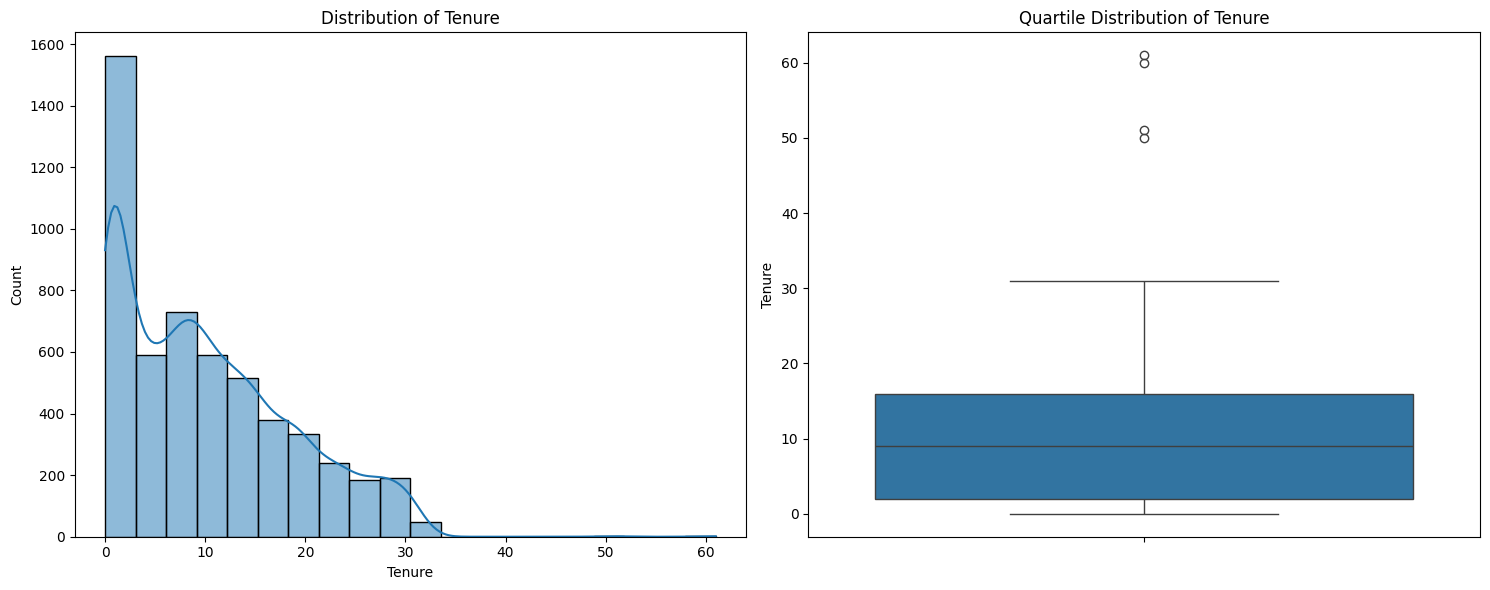

In [ ]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the distribution of Tenure using displot
sns.histplot(df['Tenure'], ax=axes[0], kde=True, bins=20)
axes[0].set_title('Distribution of Tenure')

# Plot the quartile distribution of Tenure
sns.boxplot(y=df['Tenure'], ax=axes[1])
axes[1].set_title('Quartile Distribution of Tenure')

plt.tight_layout()
plt.show()

In [ ]:
quartiles_tn = df['Tenure'].describe()

# Print quartiles and other statistics
print("Quartiles and Other Statistics for 'Tenure' Feature:")
print(quartiles_tn)

# Calculate quartiles and IQR
Q1_tn = quartiles_tn['25%']
Q3_tn = quartiles_tn['75%']
IQR_tn = Q3_tn - Q1_tn

# Define outlier boundaries
lower_bound_tn = Q1_tn - 1.5 * IQR_tn
upper_bound_tn = Q3_tn + 1.5 * IQR_tn

# Count outliers
outliers_count_tn = df[(df['Tenure'] < lower_bound_tn) | (df['Tenure'] > upper_bound_tn)]['Tenure'].count()

# Print number of outliers
print("Number of Outliers for 'Tenure' Feature:", outliers_count_tn)

Quartiles and Other Statistics for 'Tenure' Feature:
count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64
Number of Outliers for 'Tenure' Feature: 4


In [ ]:
# Divide data into quartiles
df_filtered_tn = df[(df['Tenure'] >= Q1_tn - 1.5 * IQR_tn) & (df['Tenure'] <= Q3_tn + 1.5 * IQR_tn)]
df_filtered_tn['Quartile'] = pd.qcut(df_filtered_tn['Tenure'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Create dataframe for plotting
plot_data_tn = df_filtered_tn.groupby(['Quartile', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages for each quartile
plot_data_percentage_tn = plot_data_tn.div(plot_data_tn.sum(axis=1), axis=0) * 100

# Reshape dataframe for plotting
plot_data_tn = plot_data_tn.reset_index().melt(id_vars='Quartile', var_name='Churn', value_name='Count')
plot_data_percentage_tn = plot_data_percentage_tn.reset_index().melt(id_vars='Quartile', var_name='Churn', value_name='Percentage')

# Merge count and percentage data
plot_data_tn = pd.merge(plot_data_tn, plot_data_percentage_tn, on=['Quartile', 'Churn'])

# Create text labels for the count and percentage values
plot_data_tn['text'] = plot_data_tn['Count'].astype(str) + ' (' + plot_data_tn['Percentage'].round(2).astype(str) + '%)'

# Create bar plot using Plotly Express
fig_tn = px.bar(plot_data_tn, x='Quartile', y='Count', color='Churn', barmode='group',
             text='text', labels={'Quartile': 'Quartile', 'Count': 'Count'},
             title='Quartile Distribution of Tenure by Churn',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout to include count and percentage values on top of bars
fig_tn.update_traces(textposition='outside')

# Show plot
fig_tn.show()

We can see with the help of the above figures that most clients are placed between the Tenure values of 2 and 16. However the tenure level of 0 and 1 are the labels with the most data points. We can also notice that most of the churned clients belong to this group of low Tenure (46,52% of churned clients have tenure of either 0 or 1).

8- Checking Complain

In [ ]:
quartiles_cp = df['Complain'].describe()

# Print quartiles and other statistics
print("Quartiles and Other Statistics for 'Complain' Feature:")
print(quartiles_cp)

# Calculate quartiles and IQR
Q1_cp = quartiles_cp['25%']
Q3_cp = quartiles_cp['75%']
IQR_cp = Q3_cp - Q1_cp

# Define outlier boundaries
lower_bound_cp = Q1_cp - 1.5 * IQR_cp
upper_bound_cp = Q3_cp + 1.5 * IQR_cp

# Count outliers
outliers_count_cp = df[(df['Complain'] < lower_bound_cp) | (df['Complain'] > upper_bound_cp)]['Complain'].count()

# Print number of outliers
print("Number of Outliers for 'Complain' Feature:", outliers_count_cp)

Quartiles and Other Statistics for 'Complain' Feature:
count    5630.000000
mean        0.284902
std         0.451408
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Complain, dtype: float64
Number of Outliers for 'Complain' Feature: 0


In [ ]:
# Create dataframe for plotting
plot_data_cp = df.groupby(['Complain', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages for each category
plot_data_percentage_cp = plot_data_cp.div(plot_data_cp.sum(axis=1), axis=0) * 100

# Reshape dataframe for plotting
plot_data_cp = plot_data_cp.reset_index().melt(id_vars='Complain', var_name='Churn', value_name='Count')
plot_data_percentage_cp = plot_data_percentage_cp.reset_index().melt(id_vars='Complain', var_name='Churn', value_name='Percentage')

# Merge count and percentage data
plot_data_cp = pd.merge(plot_data_cp, plot_data_percentage_cp, on=['Complain', 'Churn'])

# Create text labels for the count and percentage values
plot_data_cp['text'] = plot_data_cp['Count'].astype(str) + ' (' + plot_data_cp['Percentage'].round(2).astype(str) + '%)'

# Create bar plot using Plotly Express
fig_cp = px.bar(plot_data_cp, x='Complain', y='Count', color='Churn', barmode='group',
             text='text', labels={'Complain': 'Complain', 'Count': 'Count'},
             title='Distribution of Complain by Churn',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout to include count and percentage values on top of bars
fig_cp.update_traces(textposition='outside')

# Show plot
fig_cp.show()

Since the feature Complain has no significant correlation with any feature other then Churn, it is not crucial to explore its relationship with other variables if our primary goal is to understand churn. In the figure above it is clear to see that the majority of churned clients (508 or 53% of the total 948 churned) are clients with a Complain. In addition, it is important to remember that the dataset is imbalanced, that is, there are more data points of non-churned (83% of the dataset) customers than churned (16% of the dataset), this highlights how much the feature Complain is a significant indicator of churning.

9- Checking DaySinceLastOrder

In [ ]:
quartiles_dslo = df['DaySinceLastOrder'].describe()

# Print quartiles and other statistics
print("Statistics for 'DaySinceLastOrder':")
print(quartiles_dslo)

# Calculate quartiles and IQR
Q1_dslo = quartiles_dslo['25%']
Q3_dslo = quartiles_dslo['75%']
IQR_dslo = Q3_dslo - Q1_dslo

# Define outlier boundaries
lower_bound_dslo = Q1_dslo - 1.5 * IQR_dslo
upper_bound_dslo = Q3_dslo + 1.5 * IQR_dslo

# Count outliers
outliers_count_dslo = df[(df['DaySinceLastOrder'] < lower_bound_dslo) | (df['DaySinceLastOrder'] > upper_bound_dslo)]['DaySinceLastOrder'].count()

# Print number of outliers
print("Number of Outliers for 'DaySinceLastOrder' Feature:", outliers_count_dslo)

Statistics for 'DaySinceLastOrder':
count    5323.000000
mean        4.543491
std         3.654433
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64
Number of Outliers for 'DaySinceLastOrder' Feature: 62


In [ ]:
# Create violin plot for 'DaySinceLastOrder' with horizontal orientation
fig_dslo = px.violin(df, x='DaySinceLastOrder', box=True, points="all", orientation='h')

# Update layout
fig_dslo.update_layout(title='Distribution of DaySinceLastOrder',
                  xaxis_title='DaySinceLastOrder')

# Show plot
fig_dslo.show()

In [ ]:
df_dslo = df.copy()
df_dslo['DaySinceLastOrder'] = df_dslo['DaySinceLastOrder'].fillna('NaN')

# Group data by DaySinceLastOrder and churn, and count the number of entries
churned_count_per_day = df_dslo[df_dslo['Churn'] == 1].groupby(['DaySinceLastOrder']).size()

# Print the result
print(churned_count_per_day)

DaySinceLastOrder
0.0     170
1.0     182
2.0     122
3.0     130
4.0      58
5.0      28
6.0      16
7.0      65
8.0      66
9.0      28
10.0     10
11.0      8
12.0      2
14.0      4
15.0      4
46.0      1
NaN      54
dtype: int64


In [ ]:
# Create a copy of the DataFrame df
df_dslo2 = df.copy()

# Replace missing values in the variable 'DaySinceLastOrder' with fictitious value 50 for plotting purpose
df_dslo2['DaySinceLastOrder'].fillna(50, inplace=True)

# Define custom bins for grouping DaySinceLastOrder
custom_bins_dslo2 = [0, 3, 7, 11, 15, 30, 46, 50]

# Define the interval labels
interval_labels_dslo2 = ['[0, 1, 2, 3]', '[4, 5, 6, 7]', '[8, 9, 10, 11]', '[12, 13, 14, 15]', '[16, 17, 18, 30]', '[31, 46]', 'NaN']

# Group data by custom intervals and Churn status
intervals_dslo2 = pd.cut(df_dslo2['DaySinceLastOrder'], bins=custom_bins_dslo2, labels=interval_labels_dslo2, include_lowest=True)
grouped_data_dslo2 = df_dslo2.groupby([intervals_dslo2, 'Churn']).size().unstack(fill_value=0)

# Calculate percentages for each interval
percentage_data_dslo2 = grouped_data_dslo2.div(grouped_data_dslo2.sum(axis=1), axis=0) * 100

# Reshape data for plotting
plot_data_dslo2 = grouped_data_dslo2.reset_index().melt(id_vars='DaySinceLastOrder', var_name='Churn', value_name='Count')
plot_data_percentage_dslo2 = percentage_data_dslo2.reset_index().melt(id_vars='DaySinceLastOrder', var_name='Churn', value_name='Percentage')

# Merge count and percentage data
plot_data_dslo2 = pd.merge(plot_data_dslo2, plot_data_percentage_dslo2, on=['DaySinceLastOrder', 'Churn'])

# Create text labels for the count and percentage values
plot_data_dslo2['text'] = plot_data_dslo2['Count'].astype(str) + ' (' + plot_data_dslo2['Percentage'].round(2).astype(str) + '%)'

# Create bar plot using Plotly Express
fig_dslo2 = px.bar(plot_data_dslo2, x='DaySinceLastOrder', y='Count', color='Churn', barmode='group',
             text='text', labels={'DaySinceLastOrder': 'Days Since Last Order', 'Count': 'Count'},
             title='Distribution of Days Since Last Order by Churn',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout to include count and percentage values on top of bars
fig_dslo2.update_traces(textposition='outside')

# Show plot
fig_dslo2.show()

Most of the churned clients have low values (between 0 and 11) for the feature
'DaySinceLastOrder'. In total, 883 of the 948 churned clients. The interval of values ranging from 0 and 3 have the highest ratio of churned clients, 21,54% of all customers with DaysSinceLastOrder inside this braket have churned.

10- Checking CashbackAmount

In [ ]:
quartiles_ca = df['CashbackAmount'].describe()

# Print quartiles and other statistics
print("Statistics for 'CashbackAmount':")
print(quartiles_ca)

# Calculate quartiles and IQR
Q1_ca = quartiles_ca['25%']
Q3_ca = quartiles_ca['75%']
IQR_ca = Q3_ca - Q1_ca

# Define outlier boundaries
lower_bound_ca = Q1_ca - 1.5 * IQR_ca
upper_bound_ca = Q3_ca + 1.5 * IQR_ca

# Count outliers
outliers_count_ca = df[(df['CashbackAmount'] < lower_bound_ca) | (df['CashbackAmount'] > upper_bound_ca)]['CashbackAmount'].count()

# Print number of outliers
print("Number of Outliers for 'CashbackAmount' Feature:", outliers_count_ca)

Statistics for 'CashbackAmount':
count    5630.000000
mean      177.223030
std        49.207036
min         0.000000
25%       145.770000
50%       163.280000
75%       196.392500
max       324.990000
Name: CashbackAmount, dtype: float64
Number of Outliers for 'CashbackAmount' Feature: 438


In [ ]:
# Filter data for Churn = 1 and Churn = 0
churn_1_data_ca2 = df[df['Churn'] == 1]
churn_0_data_ca2 = df[df['Churn'] == 0]

# Create violin plot
fig_ca2 = px.violin(df, x='Churn', y='CashbackAmount', box=True, points="all", color='Churn',
                category_orders={'Churn': [1, 0]},
                violinmode='overlay', title='Distribution of CashbackAmount by Churn')

# Update layout
fig_ca2.update_layout(xaxis_title='Churn', yaxis_title='CashbackAmount')

# Show plot
fig_ca2.show()

In [ ]:
df_filtered_ca = df[(df['CashbackAmount'] >= Q1_ca - 1.5 * IQR_ca) & (df['CashbackAmount'] <= Q3_ca + 1.5 * IQR_ca)]
df_filtered_ca['Quartile'] = pd.qcut(df_filtered_ca['CashbackAmount'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Create dataframe for plotting
plot_data_ca = df_filtered_ca.groupby(['Quartile', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages for each quartile
plot_data_percentage_ca = plot_data_ca.div(plot_data_ca.sum(axis=1), axis=0) * 100

# Reshape dataframe for plotting
plot_data_ca = plot_data_ca.reset_index().melt(id_vars='Quartile', var_name='Churn', value_name='Count')
plot_data_percentage_ca = plot_data_percentage_ca.reset_index().melt(id_vars='Quartile', var_name='Churn', value_name='Percentage')

# Merge count and percentage data
plot_data_ca = pd.merge(plot_data_ca, plot_data_percentage_ca, on=['Quartile', 'Churn'])

# Create text labels for the count and percentage values
plot_data_ca['text'] = plot_data_ca['Count'].astype(str) + ' (' + plot_data_ca['Percentage'].round(2).astype(str) + '%)'

# Create bar plot using Plotly Express
fig_ca = px.bar(plot_data_ca, x='Quartile', y='Count', color='Churn', barmode='group',
             text='text', labels={'Quartile': 'Quartile', 'Count': 'Count'},
             title='Quartile Distribution of CashbackAmount by Churn',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout to include count and percentage values on top of bars
fig_ca.update_traces(textposition='outside')

# Show plot
fig_ca.show()

When it comes to CashbackAmount, we can see that customers with lower values are more likely to churn than the one withe higher values. The first quartile is the one highest churn ratio. We can also observe this looking at the violin distribution chart, churned clients have lower median than non-churned ones. Another interesting information is the high amount of outliers (438) which might interfere a bit in the analysis.

# Data Preprocessing

1- Handling  missing  values

In [ ]:
# Calculate the total number of data points in the dataset
total_data_points = len(df)

# Calculate the number of missing values for each feature
missing_values_count = df.isnull().sum()

# Calculate the percentage of missing values for each feature
missing_values_percentage = (missing_values_count / total_data_points) * 100

# Create a DataFrame to display the results
missing_data_info = pd.DataFrame({'Feature': missing_values_count.index,
                                  'Missing Values': missing_values_count.values,
                                  'Percentage (%)': missing_values_percentage.values})
# Calculate the number of rows with at least one missing value
num_rows_with_missing = df.isnull().any(axis=1).sum()

# Total number of rows in the dataset
total_rows = len(df)

# Print the DataFrame
print(missing_data_info)
print(f"Number of rows with at least one missing value: {num_rows_with_missing}")
print(f"Total number of rows in the dataset: {total_rows}")
print(f"Percentage of rows with missing value: {100*(num_rows_with_missing/total_rows):.2f}%")

                        Feature  Missing Values  Percentage (%)
0                    CustomerID               0        0.000000
1                         Churn               0        0.000000
2                        Tenure             264        4.689165
3          PreferredLoginDevice               0        0.000000
4                      CityTier               0        0.000000
5               WarehouseToHome             251        4.458259
6          PreferredPaymentMode               0        0.000000
7                        Gender               0        0.000000
8                HourSpendOnApp             255        4.529307
9      NumberOfDeviceRegistered               0        0.000000
10             PreferedOrderCat               0        0.000000
11            SatisfactionScore               0        0.000000
12                MaritalStatus               0        0.000000
13              NumberOfAddress               0        0.000000
14                     Complain         

Only 7 features have missing values, and none of these features have more then 6% of missing values. However the total number of rows with at least one missing value is 1856 or more than 32% of the total dataset. This information is relevant because we now know that removing rows with missing data is not an option, given the amount of it.

In [ ]:
df2 = df.copy()

# List of features with missing values
missing_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# Dictionary to store imputer instances for each feature
imputers = {}

# Loop through each feature and create a KNNImputer instance
for col in missing_cols:
    imputer = KNNImputer(n_neighbors=5)
    imputers[col] = imputer

# Impute missing values for each feature using its respective imputer
for col, imputer in imputers.items():
    df2[col] = imputer.fit_transform(df2[[col]])


print("Number of missing values after imputation:")
print(df2[missing_cols].isnull().sum())

Number of missing values after imputation:
Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
dtype: int64


KNN Imputer was chosen to handle the missing variables for the following reasons:

Simple Concept: KNN imputation is straightforward to understand and implement.

Preserves Relationships: It preserves the relationships between features by using similar data points for imputation.

Flexibility: KNN can handle both numerical and categorical data, making it versatile for various types of datasets.

No Assumptions: KNN imputation does not make any strong assumptions about the underlying distribution of data.

2- Encoding

In [ ]:
# List to store categorical variables
cat_var = []

# Iterate through each column in the DataFrame
for i in df2.columns:
    # Check if the column dtype is 'object' (indicating categorical variable)
    if df2[i].dtype == 'object':
        # Print the unique values of the column
        print(df2[i].value_counts())
        print('*' * 40)
        # Append the column name to the list of categorical variables
        cat_var.append(i)

# Print the list of categorical variables
print("Categorical Variables:", cat_var)

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64
****************************************
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64
****************************************
Male      3384
Female    2246
Name: Gender, dtype: int64
****************************************
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
****************************************
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
****************************************
Categorical Variables: ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


In [ ]:
# Create a new DataFrame copy containing only categorical variables
df_categorical = df2[cat_var].copy()

# Display the first few rows of the new DataFrame
df_categorical

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Mobile Phone,UPI,Male,Mobile Phone,Single
2,Mobile Phone,Debit Card,Male,Mobile Phone,Single
3,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
4,Mobile Phone,Credit Card,Male,Mobile Phone,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [ ]:
df3 = df2.copy()

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the encoder on the categorical columns
encoded_data = encoder.fit_transform(df3[cat_var])

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(input_features=cat_var)

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Concatenate the encoded DataFrame with the original DataFrame
df3_encoded = pd.concat([df3.drop(columns=cat_var), encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
df3_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.000000,3,6.0,3.000000,3,2,9,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,50002,1,10.189899,1,8.0,3.000000,4,3,7,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,50003,1,10.189899,1,30.0,2.000000,4,3,6,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,50004,1,0.000000,3,15.0,2.000000,4,5,8,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,50005,1,0.000000,1,12.0,2.931535,3,5,3,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


OneHotEncoder from sklearn was used to encode the categorical variables because the labels had no ordinality character between themselves. If there were, than a ordinal encoder would be better.

3- Handling Outliers

In [ ]:
# Make a copy of 'df2_encoded' and call it 'df4'
df4 = df3_encoded.copy()

# Define a function to calculate the number of outliers for each non-categorical feature
def calculate_outliers(df):
    non_cat_columns = [col for col in df.select_dtypes(exclude=['object']).columns
                       if col not in ['CustomerID', 'CityTier'] and df[col].nunique() > 2]
    outliers_info = []

    for column in non_cat_columns:
        # Calculate the first quartile (Q1)
        Q1 = df[column].quantile(0.25)

        # Calculate the third quartile (Q3)
        Q3 = df[column].quantile(0.75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Calculate the lower bound
        lower_bound = Q1 - 1.5 * IQR

        # Calculate the upper bound
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

        # Calculate the percentage of outliers relative to the total data points
        percentage = (outliers_count / len(df)) * 100

        # Append the information to the list
        outliers_info.append({
            'Variable': column,
            'OutliersCount': outliers_count,
            'Percentage': percentage
        })

    # Create a DataFrame to store the results
    outliers_df = pd.DataFrame(outliers_info)

    # Print the DataFrame
    print(outliers_df)

# Call the function to calculate outliers for dataset 'df4'
calculate_outliers(df4)

                       Variable  OutliersCount  Percentage
0                        Tenure              4    0.071048
1               WarehouseToHome              2    0.035524
2                HourSpendOnApp              6    0.106572
3      NumberOfDeviceRegistered            397    7.051510
4             SatisfactionScore              0    0.000000
5               NumberOfAddress              4    0.071048
6   OrderAmountHikeFromlastYear             33    0.586146
7                    CouponUsed            629   11.172291
8                    OrderCount            703   12.486679
9             DaySinceLastOrder             62    1.101243
10               CashbackAmount            438    7.779751


10 features in total have  outliersThe, however the amount of outliers is significant in 4 features only, where more than 7% of the data points are outside the IQR. Let's change the outliers to more adequate values so they wont compromise the future model.

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound, upper_bound

for column in df4.columns:
    if df4[column].dtype != 'object' and column not in ['CustomerID', 'CityTier'] and not df4[column].isin([0, 1]).all():
        lower_bound, upper_bound = remove_outlier(df4[column])
        df4[column] = np.where(df4[column] > upper_bound, upper_bound, df4[column])
        df4[column] = np.where(df4[column] < lower_bound, lower_bound, df4[column])

In [ ]:
calculate_outliers(df4)

                       Variable  OutliersCount  Percentage
0                        Tenure              0         0.0
1               WarehouseToHome              0         0.0
2                HourSpendOnApp              0         0.0
3      NumberOfDeviceRegistered              0         0.0
4             SatisfactionScore              0         0.0
5               NumberOfAddress              0         0.0
6   OrderAmountHikeFromlastYear              0         0.0
7                    CouponUsed              0         0.0
8                    OrderCount              0         0.0
9             DaySinceLastOrder              0         0.0
10               CashbackAmount              0         0.0


The outliers were successfully changed to the closeset IQR limit value.

4- Handling Imbalanced Dataset

In [ ]:
df5 = df4.drop(columns=['CustomerID']).copy()

# Extract features and target variable
X = df5.drop('Churn', axis=1)
Y = df5['Churn']

# Initialize SMOTETomek
smt = SMOTETomek(random_state=42)

# Perform SMOTETomek resampling
x_resamp, y_resamp = smt.fit_resample(X, Y)

# Check the shape of the resampled data
print("Resampled feature shape:", x_resamp.shape)
print("Resampled target shape:", y_resamp.shape)

Resampled feature shape: (9364, 25)
Resampled target shape: (9364,)


SMOTETomek was used to resample the dataset that was identified as imbalanced in the beginning of the analysis. SMOTETomek combines these two techniques by first applying SMOTE to generate synthetic samples in the minority class, and then applying Tomek Links to remove any noisy or borderline instances. This combined approach aims to improve the overall balance of the dataset while also improving the separation between classes. It is commonly used in scenarios where there is significant class imbalance and the dataset contains noisy or borderline instances.

5- Splitting and Standardization of the Dataset

In [ ]:
# Split the resampled data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x_resamp, y_resamp, test_size=0.2, random_state=42)

In [ ]:
# List of categorical features
categorical_features = ['Complain', 'CityTier']  # Add other categorical features here

# Standardization of non categorical features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for col in X_train.columns:
    if col not in categorical_features and X_train[col].nunique() > 2:
        scaler = StandardScaler()
        X_train_scaled[col] = scaler.fit_transform(X_train_scaled[[col]])
        X_test_scaled[col] = scaler.transform(X_test_scaled[[col]])

# Modelling

In [ ]:
logistic_regression = LogisticRegression()
knn_classifier = KNeighborsClassifier()
svc_classifier = SVC()
adaboost_classifier = AdaBoostClassifier()

In [ ]:
classifier_list = [logistic_regression, knn_classifier, svc_classifier, adaboost_classifier]

classifier_name_list = ['Logistic Regression', 'KNN Classifier', 'SVC', 'AdaBoost Classifier']

In [ ]:
# Assuming you have the necessary data and lists from your previous code
train_scores = []
test_scores = []
train_acc_scores = []
test_acc_scores = []

# Loop through classifiers to compute scores
for clf, name in zip(classifier_list, classifier_name_list):
    clf.fit(X_train_scaled, Y_train)
    y_pred_train = clf.predict(X_train_scaled)
    y_pred_test = clf.predict(X_test_scaled)
    train_score = clf.score(X_train_scaled, Y_train)
    test_score = clf.score(X_test_scaled, Y_test)
    train_acc = accuracy_score(Y_train, y_pred_train)
    test_acc = accuracy_score(Y_test, y_pred_test)

    train_scores.append(train_score)
    test_scores.append(test_score)
    train_acc_scores.append(train_acc)
    test_acc_scores.append(test_acc)

# Create DataFrame
classifier_results = pd.DataFrame({
    'Classifier': classifier_name_list,
    'Training Score': train_scores,
    'Test Score': test_scores,
    'Training Accuracy': train_acc_scores,
    'Test Accuracy': test_acc_scores
})

# Print the DataFrame
classifier_results

,Classifier,Training Score,Test Score,Training Accuracy,Test Accuracy
0,Logistic Regression,0.807636,0.792846,0.807636,0.792846
1,KNN Classifier,0.969430,0.931660,0.969430,0.931660
2,SVC,0.961821,0.936999,0.961821,0.936999
3,AdaBoost Classifier,0.911494,0.903364,0.911494,0.903364


CLASSIFIER RESULTS:

Logistic Regrssion: the Logistic Regression model demonstrates consistent performance between training and test datasets, with similar accuracy scores. However, the accuracy score of approximately 79% suggests moderate performance compared to other models.

KNN Classifier: the KNN Classifier exhibits high training and test scores, indicating robust performance on both datasets. With an accuracy score of approximately 93%, this model demonstrates strong predictive capabilities and generalization to unseen data.

Support Vector Classifier: the SVC model shows high training and test scores, indicating excellent performance on both datasets. With an accuracy score of approximately 94%, this model performs exceptionally well in predicting the target variable and generalizing to new data.

AdaBoost Classifier: the AdaBoost Classifier demonstrates moderate performance, with slightly lower accuracy scores compared to the KNN Classifier and SVC models. However, with an accuracy score of approximately 90%, this model still performs well in predicting the target variable

# Model Evaluation

Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       939
           1       0.77      0.84      0.80       934

    accuracy                           0.79      1873
   macro avg       0.80      0.79      0.79      1873
weighted avg       0.80      0.79      0.79      1873

Confusion Matrix:
[[703 236]
 [152 782]]


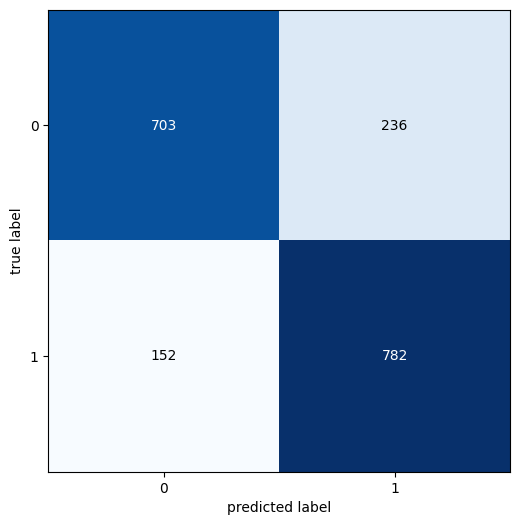

ROC Curve:


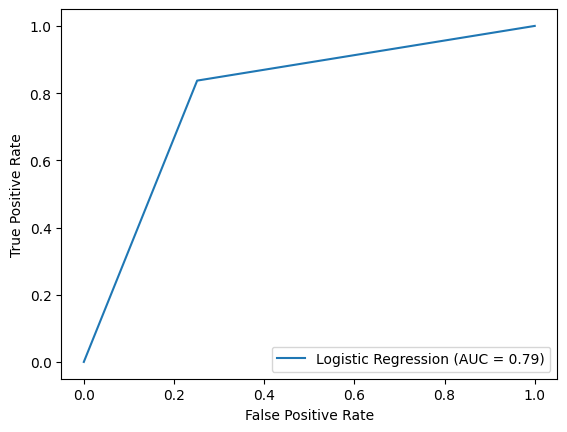

**************************************************


Model: KNN Classifier

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       939
           1       0.88      1.00      0.94       934

    accuracy                           0.93      1873
   macro avg       0.94      0.93      0.93      1873
weighted avg       0.94      0.93      0.93      1873

Confusion Matrix:
[[813 126]
 [  2 932]]


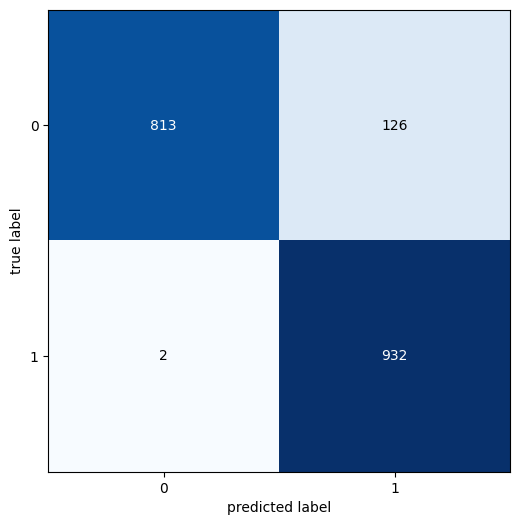

ROC Curve:


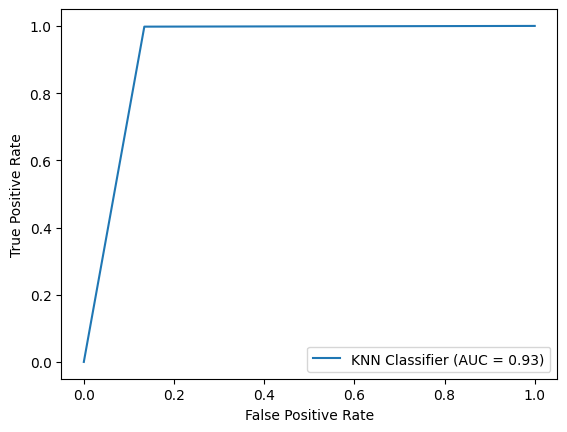

**************************************************


Model: SVC

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       939
           1       0.91      0.97      0.94       934

    accuracy                           0.94      1873
   macro avg       0.94      0.94      0.94      1873
weighted avg       0.94      0.94      0.94      1873

Confusion Matrix:
[[845  94]
 [ 24 910]]


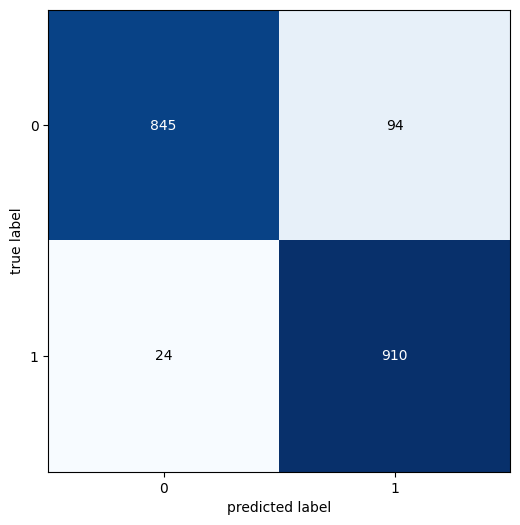

ROC Curve:


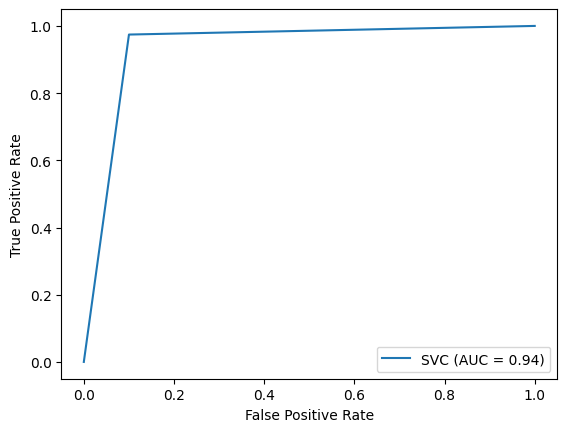

**************************************************


Model: AdaBoost Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       939
           1       0.90      0.91      0.90       934

    accuracy                           0.90      1873
   macro avg       0.90      0.90      0.90      1873
weighted avg       0.90      0.90      0.90      1873

Confusion Matrix:
[[842  97]
 [ 84 850]]


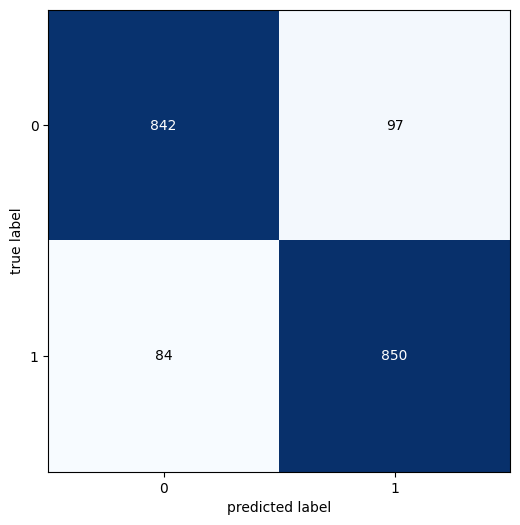

ROC Curve:


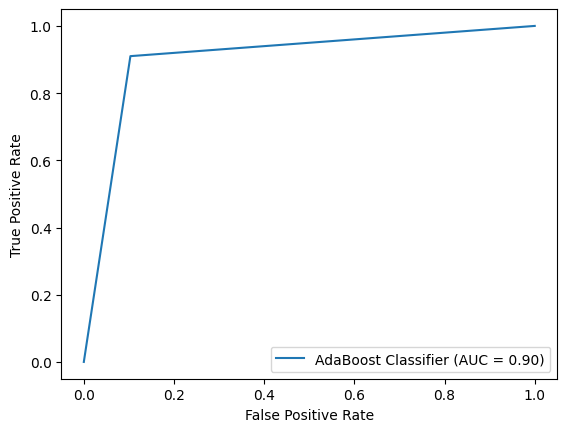

**************************************************




In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay

# Loop through each model
for clf, name in zip(classifier_list, classifier_name_list):
    # Fit the model
    clf.fit(X_train_scaled, Y_train)

    # Generate predictions
    y_pred_train = clf.predict(X_train_scaled)
    y_pred_test = clf.predict(X_test_scaled)

    # Print model name
    print(f'Model: {name}\n')

    # Print classification report
    print("Classification Report:")
    print(classification_report(Y_test, y_pred_test))

    # Calculate and print confusion matrix
    print("Confusion Matrix:")
    conf_mat = confusion_matrix(Y_test, y_pred_test)
    print(conf_mat)
    fig, ax = plot_confusion_matrix(conf_mat, figsize=(6, 6))
    plt.show()

    # Calculate and print ROC curve
    print("ROC Curve:")
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_test)
    roc_auc = roc_auc_score(Y_test, y_pred_test)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    display.plot()
    plt.show()

    print("*" * 50)
    print("\n")

MODELS PERFORMANCE OVERVIEW:

Logistic Regression: the Logistic Regression model appears to perform reasonably well, with balanced precision and recall values for both classes. However, there is room for improvement in reducing false positive and false negative predictions.

KNN Classifier: the KNN Classifier model performs very well, with high precision, recall, and accuracy values for both classes. However, there are a few false positives and false negatives, indicating room for improvement in certain areas.

Support Vector Classifier: the SVC model performs very well, with high precision, recall, and accuracy values for both classes. However, there are a few false positives and false negatives, indicating room for improvement in certain areas.

AdaBoost Classifier: the AdaBoost Classifier model performs well, with balanced precision, recall, and F1-score values for both classes. The accuracy is also high, indicating good overall performance. However, there are some false positives and false negatives present in the confusion matrix, suggesting areas for improvement.

MODELLING CONCLUSION:

Overall, based on the evaluation of training and test scores, accuracy metrics, and model performance, the KNN Classifier and SVC models stand out as the top-performing classifiers due to their consistently high accuracy scores and robustness in generalizing to unseen data. The Logistic Regression model performs moderately well, while the AdaBoost Classifier shows respectable performance but with slightly lower accuracy scores.

While all models demonstrate varying degrees of performance, the risk of overfitting may vary depending on the model's complexity and the dataset characteristics. Models with higher complexity, such as KNN, may have a higher likelihood of overfitting, especially with smaller datasets or insufficient regularization. On the other hand, simpler models like logistic regression may underfit the data if they are not expressive enough to capture the underlying patterns. Regularization techniques, cross-validation, and hyperparameter tuning can help mitigate overfitting and improve the generalization ability of the models.

In summary, there are still room for model improvement, including trying different models.